## Missing Data Imputation

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

### Dataset

In [2]:
# Load Titanic Dataset

data_titanic_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data_titanic = data_titanic_ori.copy()
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print(data_titanic["PassengerId"].nunique())
print(data_titanic.shape)

891
(891, 12)


In [4]:
print(data_titanic["Ticket"].nunique())
print(data_titanic.shape)

681
(891, 12)


In [5]:
print(data_titanic["Fare"].nunique())
print(data_titanic.shape)

248
(891, 12)


In [6]:
# Check missing values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Check missing values as percentage to total data

data_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# Load Mercedes-Benz Dataset

data_mercedes_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Mercedes-Benz.csv')
data_mercedes = data_mercedes_ori.copy()
data_mercedes.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Load House Prices

data_house_prices_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20House-Prices.csv')
data_house_prices = data_house_prices_ori.copy()
data_house_prices.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Missing Data Mechanisms

In [10]:
# Check Missing Values for Variable `Embarked`

data_titanic[data_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Create a variable that indicates whether the value of the variable 'cabin' is missing or not

data_titanic = data_titanic_ori.copy()
data_titanic['cabin_null'] = np.where(data_titanic.Cabin.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [12]:
# Grouping data by Survived vs Non-Survived and find nulls for cabin

print('Value Counts')
print(data_titanic.groupby(['Survived'])['cabin_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['cabin_null'].mean())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: count, dtype: int64

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


In [13]:
# Create a variable that indicates whether the value of the variable `Age` is missing or not

data_titanic['age_null'] = np.where(data_titanic.Age.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [14]:
# Grouping data by Survived vs Non-Survived and find nulls for `Age`

print('Value Counts')
print(data_titanic.groupby(['Survived'])['age_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['age_null'].mean())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: count, dtype: int64

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


### Complete Case Analysis

In [15]:
# Count How Many Observations that We Would Drop

data_titanic = data_titanic_ori.copy()
print('Total passengers in the Titanic               : ', data_titanic.shape[0])
print('Total passengers with values in all variables : ', data_titanic.dropna().shape[0])
print('Percentage of data without missing values (%) : ', data_titanic.dropna().shape[0] / np.float(data_titanic.shape[0]) * 100)

Total passengers in the Titanic               :  891
Total passengers with values in all variables :  183


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [16]:
# Check How Many Missing Values in Variable `Age` Only

data_titanic.Age.isnull().sum()

177

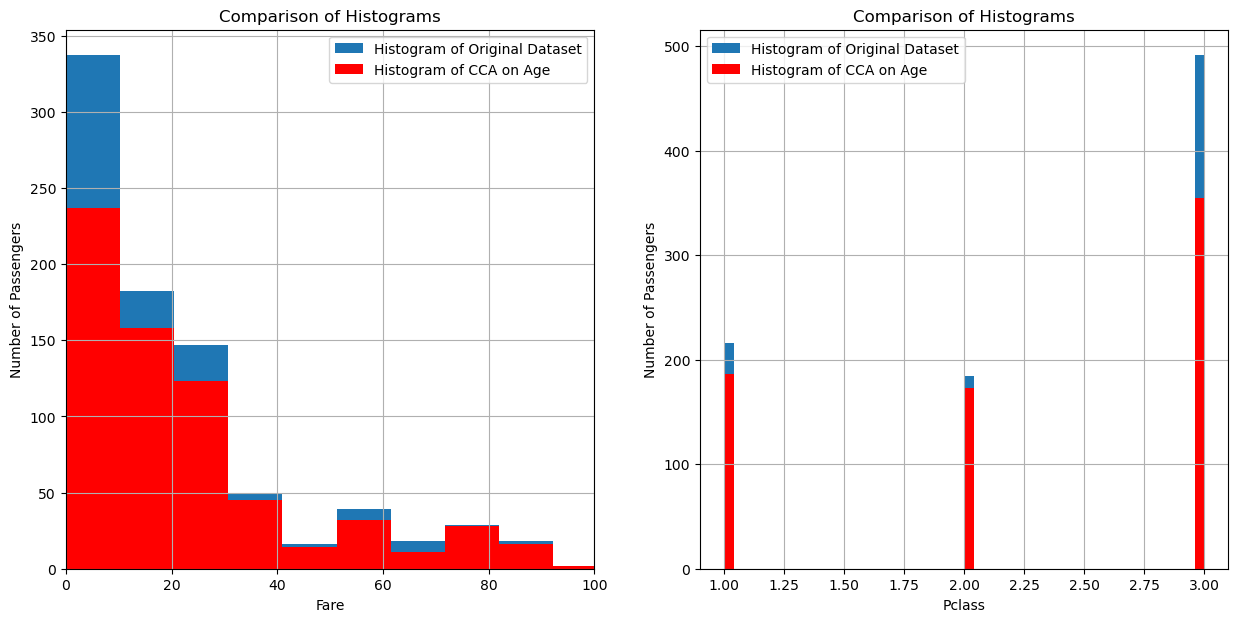

In [17]:
# Visualization of Histogram Differences between the Original Dataset and CCA for the Variable `Age` Only
# We Will Check the Effect of CCA Only to Variable `Fare` and `Pclass`

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

data_titanic.Fare.hist(bins=50, ax=ax[0], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax[0], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Age
ax[0].set_xlim(0,100)
ax[0].set_title('Comparison of Histograms')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(loc="upper right")

data_titanic.Pclass.hist(bins=50, ax=ax[1], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax[1], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Pclass
ax[1].set_title('Comparison of Histograms')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(loc="upper left")

### Mean and Median Imputation

In [18]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

Skewness :  0.3361317253050765


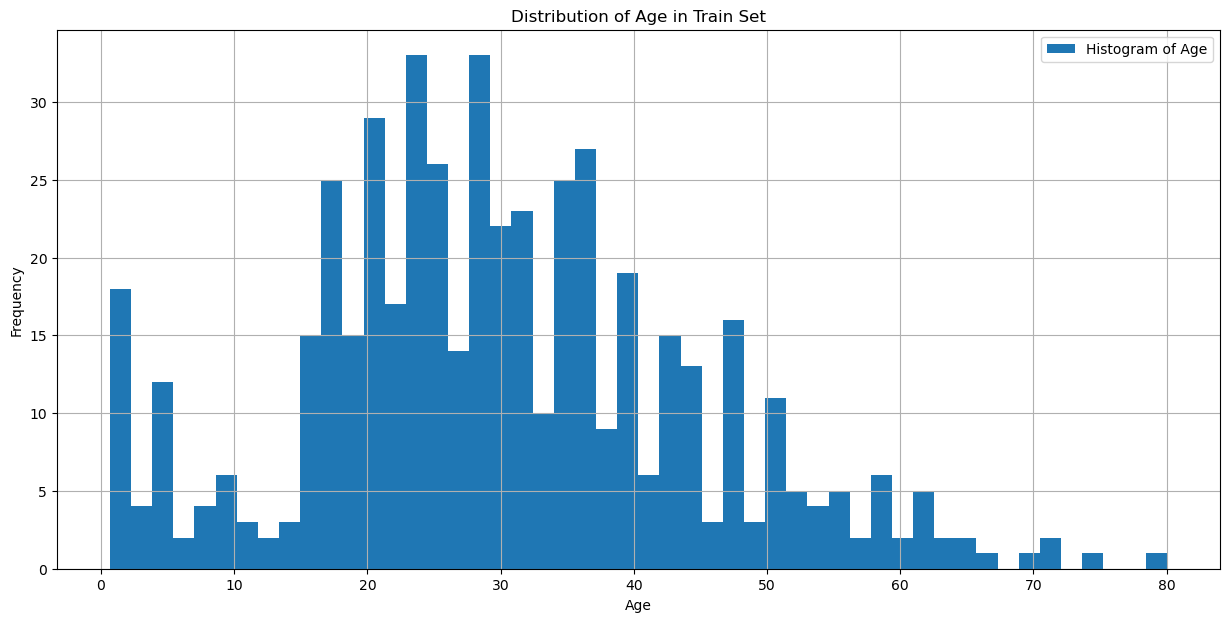

In [19]:
# Let's Check Type of Distirbution of Variable `Age`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of Age in Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_titanic.Age.skew())

In [20]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [21]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

- impute data train dari mean data train atau median data train
- impute data test dari mean data train atau median data train

In [22]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


In [23]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', X_train_titanic['Age'].std())
print('Variance - After Mean Imputation   : ', X_train_titanic['Age_mean'].std())
print('Variance - After Median Imputation : ', X_train_titanic['Age_median'].std())

Variance - Orignal                 :  14.506993804588454
Variance - After Mean Imputation   :  13.019703562523889
Variance - After Median Imputation :  13.024746215318785


<Figure size 640x480 with 0 Axes>

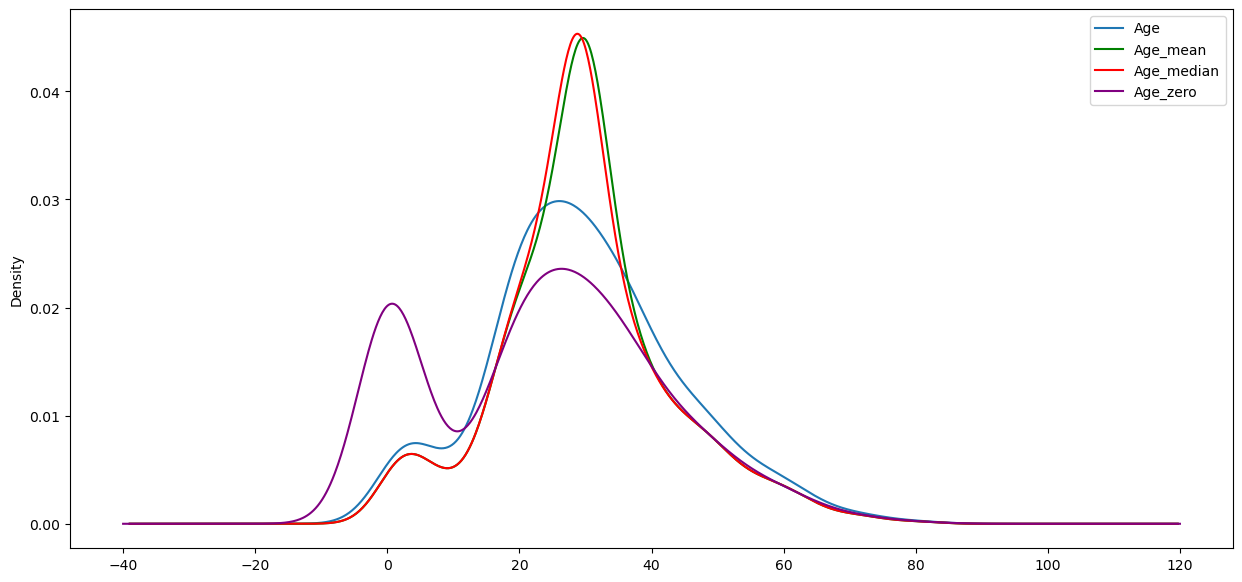

In [24]:
# Visualization Variable `Age` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
X_train_titanic.Age_zero.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, and Median

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Train set zero imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test set zero imputation')
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



In [26]:
print('Average total survival :', X_train_titanic.Survived.mean())

print('\nAverage real survival of children : ', X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes : ', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with mean   : ', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average survival of children when using Age imputed with median : ', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average total survival : 0.3884430176565008

Average real survival of children :  0.5740740740740741
Average survival of children when using Age imputed with zeroes :  0.38857142857142857
Average survival of children when using Age imputed with mean   :  0.5740740740740741
Average survival of children when using Age imputed with median :  0.5740740740740741


### Random Sample Imputation

In [27]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [28]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [29]:
# Function to Filling Missing Values with Zeroes and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample
  
  return df

In [30]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


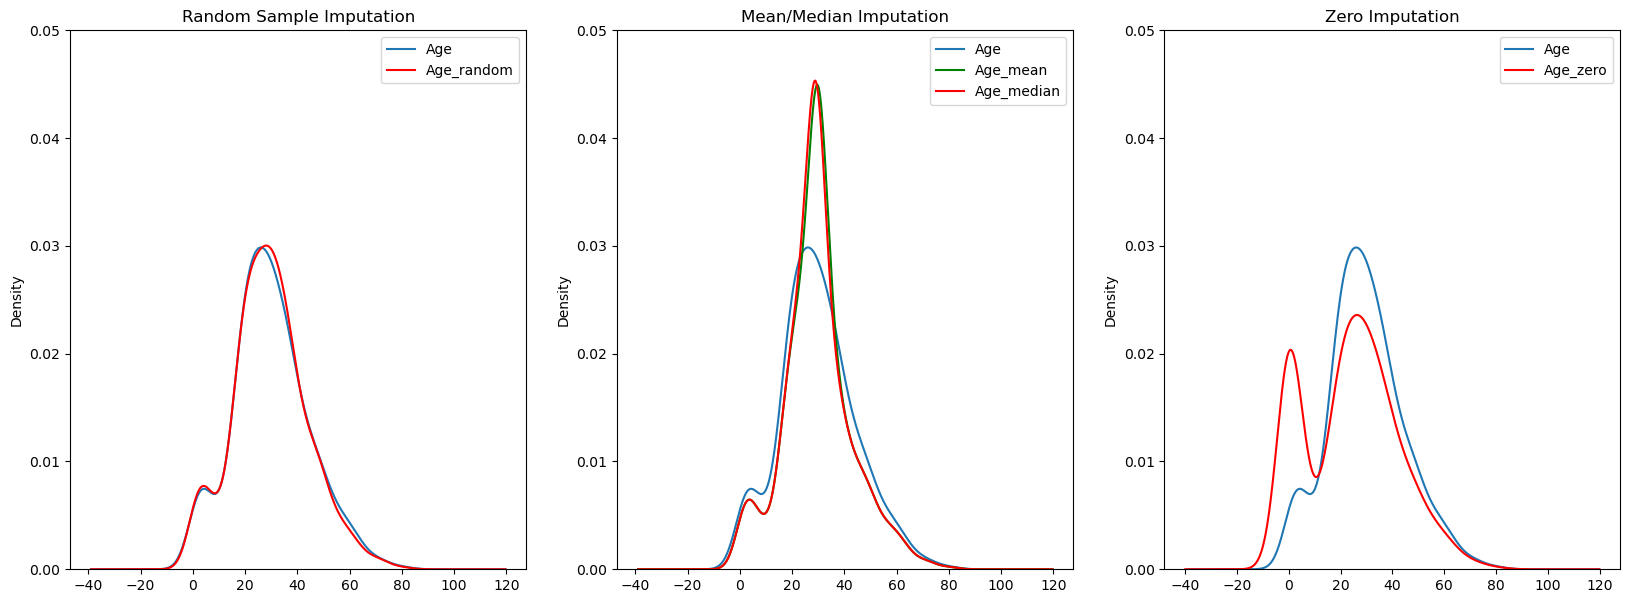

In [31]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax[0])
X_train_titanic.Age_random.plot(kind='kde', ax=ax[0], color='red')
lines, labels = ax[0].get_legend_handles_labels()
ax[0].set_ylim(0, 0.05)
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('Random Sample Imputation')
ax[0].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[1])
X_train_titanic.Age_mean.plot(kind='kde', ax=ax[1], color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax[1], color='red')
lines, labels = ax[1].get_legend_handles_labels()
ax[1].set_ylim(0, 0.05)
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('Mean/Median Imputation')
ax[1].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[2])
X_train_titanic.Age_zero.plot(kind='kde', ax=ax[2], color='red')
lines, labels = ax[2].get_legend_handles_labels()
ax[2].set_ylim(0, 0.05)
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('Zero Imputation')
ax[2].legend(loc="upper right")

In [32]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.754375



### Adding A Variable to Capture Missing Values

In [33]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [34]:
# Function to Filling Missing Values with Zeroes, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [35]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,0


In [36]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc. : 0.740654761904762

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc. : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc. : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc. : 0.7614880952380954



In [37]:
# For Demonstration Purposes, We Are Going to Use These Columns

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF', 'BsmtUnfSF',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

data_house_prices = data_house_prices_ori.copy()
data_house_prices = data_house_prices[cols_to_use + ['SalePrice']]
data_house_prices.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000
5,5,796,796,1362,40,64,85.0,0.0,1993.0,143000
6,8,1686,1694,1694,255,317,75.0,186.0,2004.0,307000
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
8,7,952,1022,1774,90,952,51.0,0.0,1931.0,129900
9,5,991,1077,1077,0,140,50.0,0.0,1939.0,118000


In [38]:
# Check Missing Values in House Prices Dataset

data_house_prices.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [39]:
# Let's Separate Dataset into Training Set and Testing Set

X_train, X_test, y_train, y_test = train_test_split(data_house_prices, 
                                                    data_house_prices.SalePrice, 
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [40]:
# Display X_train

X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0,219500
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0,173000
960,5,858,858,858,117,162,50.0,0.0,NaN,116500
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000
...,...,...,...,...,...,...,...,...,...,...
763,8,1252,1268,2365,0,89,82.0,673.0,1999.0,337000
835,4,1067,1067,1067,290,625,60.0,0.0,1996.0,128000
1216,6,0,1318,1902,0,0,68.0,0.0,1978.0,112000
559,7,1374,1557,1557,143,1374,NaN,18.0,2003.0,234000


Skewness - LotFrontage :  1.8847801735623813
Skewness - MasVnrArea  :  2.7582019163711244
Skewness - GarageYrBlt :  -0.6669763943317643


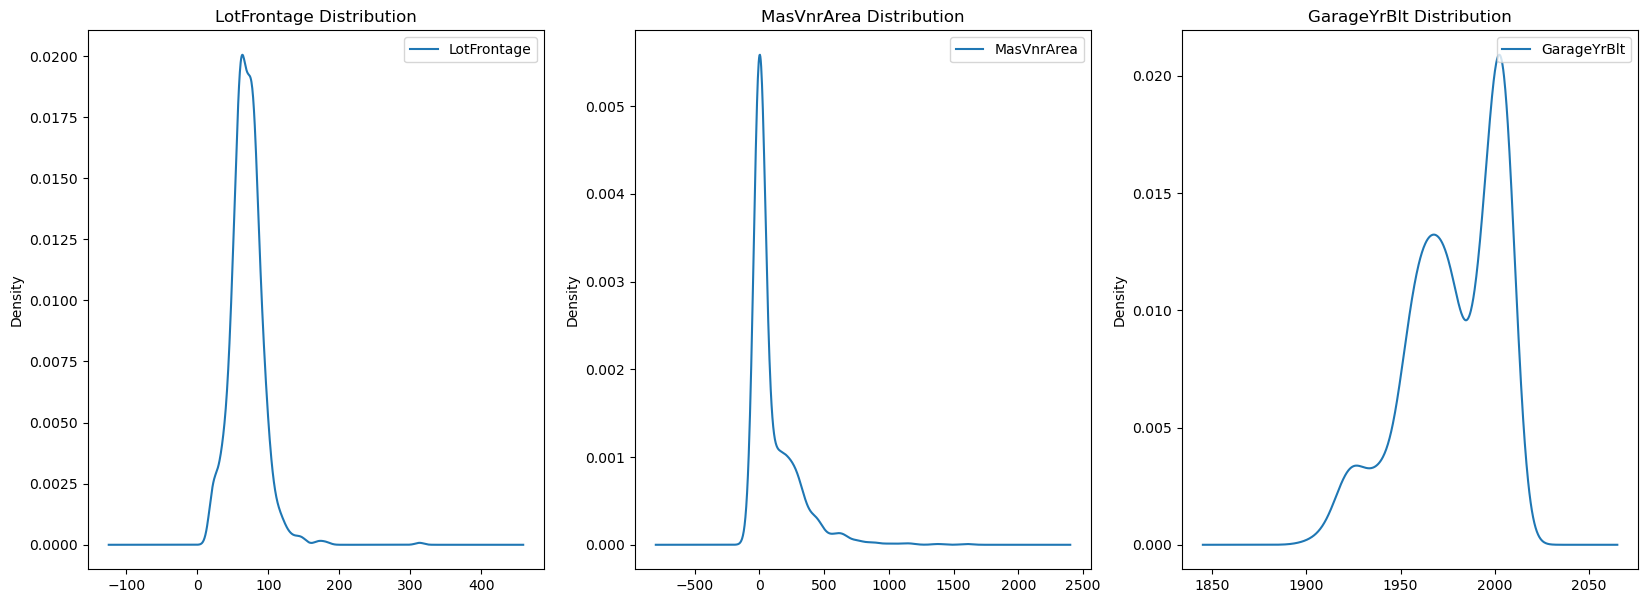

In [41]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train.LotFrontage.plot(kind='kde', ax=ax[0])
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('LotFrontage Distribution')
ax[0].legend(loc="upper right")

X_train.MasVnrArea.plot(kind='kde', ax=ax[1])
lines, labels = ax[1].get_legend_handles_labels()
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('MasVnrArea Distribution')
ax[1].legend(loc="upper right")

X_train.GarageYrBlt.plot(kind='kde', ax=ax[2])
lines, labels = ax[2].get_legend_handles_labels()
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('GarageYrBlt Distribution')
ax[2].legend(loc="upper right")

print('Skewness - LotFrontage : ', X_train.LotFrontage.skew())
print('Skewness - MasVnrArea  : ', X_train.MasVnrArea.skew())
print('Skewness - GarageYrBlt : ', X_train.GarageYrBlt.skew())

In [42]:
# Function to Filling Missing Values with Median and 0/1

def impute_na(df, variable, median):
  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  df[variable].fillna(median, inplace=True)

  return df

In [43]:
# Display Median Value for Variables that have Missing Values

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [44]:
# Impute Missing Values
X_train = impute_na(X_train, 'LotFrontage', X_train['LotFrontage'].median())
X_train = impute_na(X_train, 'MasVnrArea', X_train['MasVnrArea'].median())
X_train = impute_na(X_train, 'GarageYrBlt', X_train['GarageYrBlt'].median())

X_test = impute_na(X_test, 'LotFrontage', X_test['LotFrontage'].median()) #harusnya pake data train buka test
X_test = impute_na(X_test, 'MasVnrArea', X_test['MasVnrArea'].median())
X_test = impute_na(X_test, 'GarageYrBlt', X_test['GarageYrBlt'].median())

X_train.head(15)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
64,7,1057,1057,2034,576,318,69.0,573.0,1998.0,219500,1,0,0
682,6,1291,1291,1291,307,288,69.0,0.0,1996.0,173000,1,0,0
960,5,858,858,858,117,162,50.0,0.0,1979.0,116500,0,0,1
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000,0,0,0
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000,0,0,0
416,6,672,672,1400,0,463,74.0,203.0,1978.0,149500,0,0,0
1034,5,920,954,954,0,920,50.0,0.0,1938.0,119750,0,0,0
853,6,1127,1445,1445,180,563,69.0,115.0,1964.0,158000,1,0,0
472,6,547,1072,1072,0,88,35.0,80.0,2005.0,148000,0,0,0
1011,5,0,1664,1664,0,0,75.0,0.0,1979.0,100000,0,0,1


In [45]:
# Define List of Columns with 0/1 Imputation

cols_with_na = list(X_train.columns)
cols_with_na.remove('SalePrice')

print('Default Column            : ', cols_to_use)
print('All Columns in X_train    : ', list(X_train.columns))
print('Final Column for Training : ', cols_with_na)

Default Column            :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
All Columns in X_train    :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']
Final Column for Training :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']


In [46]:
# Standarize Dataset

## With Median Imputation and Without 0/1 Imputation
scaler = StandardScaler()
X_train_no_na = scaler.fit_transform(X_train[cols_to_use])
X_test_no_na = scaler.transform(X_test[cols_to_use])

## With Median Imputation and With 0/1 Imputation
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train[cols_with_na])
X_test_all = scaler.transform(X_test[cols_with_na])

In [47]:
# Let's Compare the Performance of Linear Regression filled with Median vs Median + 0/1

linreg = LinearRegression()
linreg.fit(X_train_no_na, y_train)
pred_train_no_na = linreg.predict(X_train_no_na)
pred_test_no_na = linreg.predict(X_test_no_na)

print('Using Median Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_no_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_no_na)))
print('')

linreg = LinearRegression()
linreg.fit(X_train_all, y_train)
pred_train_with_na = linreg.predict(X_train_all)
pred_test_with_na = linreg.predict(X_test_all)

print('Using Median + 0/1 Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_with_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_with_na)))
print('')

## Calculate Differences between `Median + 0/1 Imputation` and `Median Imputation`
diff = mean_squared_error(y_test, pred_test_no_na) - mean_squared_error(y_test, pred_test_with_na)
print('Differences : ', diff)

Using Median Imputation
MSE - Train : 1161895545.483203
MSE - Test  : 2213352533.0368676

Using Median + 0/1 Imputation
MSE - Train : 1157194541.944443
MSE - Test  : 2198183078.127067

Differences :  15169454.90980053


### Arbitrary Value Imputation

In [48]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [49]:
# Function to Filling Missing Values with Zeroes, Hundreds, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_hundred'] = df[variable].fillna(100)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [50]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,24.0,0


In [51]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_hundred.fit(X_train_titanic[['Age_hundred', 'Fare']], y_train_titanic)

pred_hundred_train = rf_hundred.predict_proba(X_train_titanic[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test_titanic[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc  : 0.740654761904762

Using hundred imputation
Train - Random Forests roc-auc : 0.7543491464393397
Test - Random Forests roc-auc  : 0.7628273809523809

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc  : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc  : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc  : 0.7614880952380954



## Outer Handling

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [53]:
# Load the Boston House dataset from sklearn
boston_dataset = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2PM%20-%20Feature%20Engineering%20-%20Part%202%20-%20Boston.csv')

# Create a dataframe with the independent variables
# Legends : 
  # - CRIM     per capita crime rate by town
  # - RM       average number of rooms per dwelling
  # - LSTAT    % lower status of the population

boston = boston_dataset[['RM', 'LSTAT', 'CRIM']]
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [55]:
# Load the Titanic dataset

url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
titanic = pd.read_csv(url, usecols=['age', 'fare'])

# The variables age and fare have missing values. For this missing value, let's remove them.
titanic.dropna(subset=['age', 'fare'], inplace=True)
titanic['age'] = pd.to_numeric(titanic['age'], errors = 'coerce')
titanic['fare'] = pd.to_numeric(titanic['fare'], errors = 'coerce')
titanic['age'] = titanic['age'].astype(float)
titanic['fare'] = titanic['fare'].astype(float)

print('Shape data : ', titanic.shape, '\n')
print(titanic.info(), '\n')
titanic.head()

Shape data :  (1309, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1046 non-null   float64
 1   fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB
None 



,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


### Identify Variable Distribution

In [56]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### Normally Distributed Variable

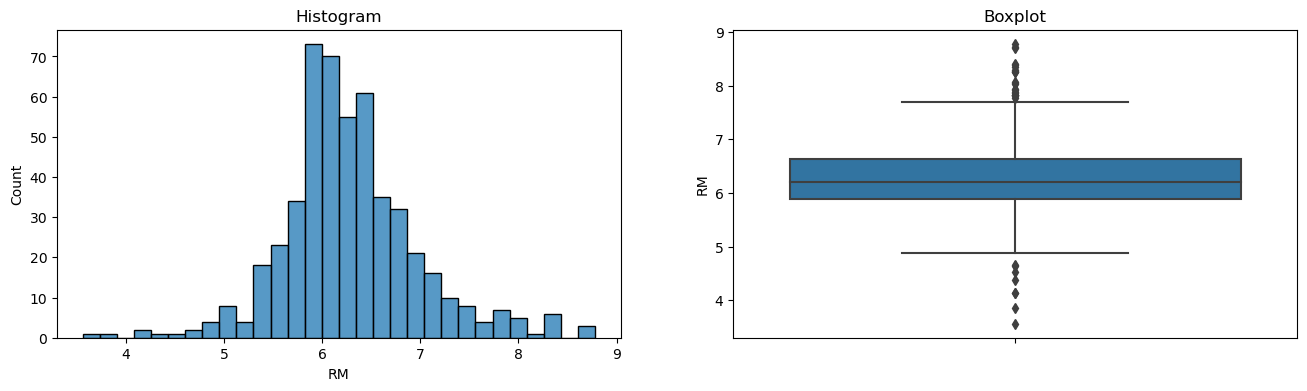


Skewness Value :  0.40361213328874385


In [57]:
# Let's start with the variable RM from the Boston House dataset.
# RM is the average number of rooms per dwelling

diagnostic_plots(boston, 'RM')
print('\nSkewness Value : ', boston['RM'].skew())

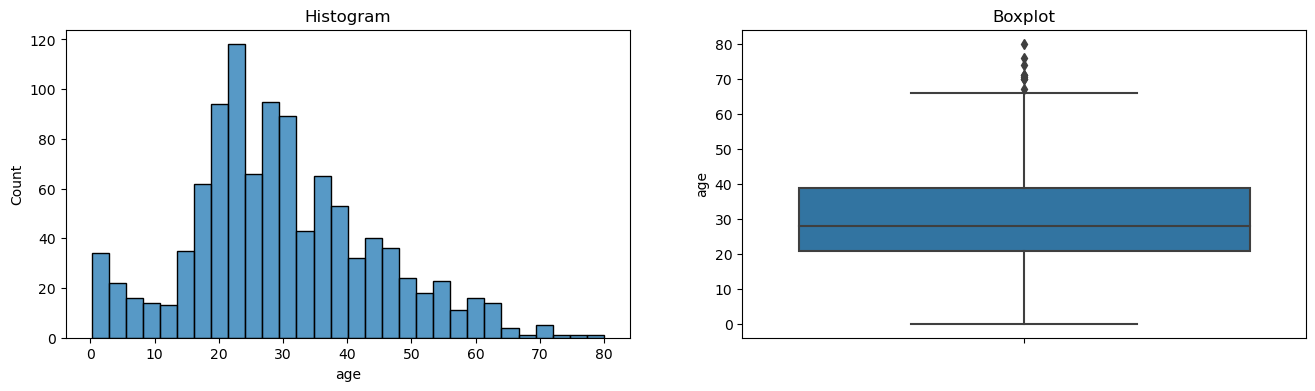


Skewness Value :  0.4076718864978293


In [58]:
# let's inspect now the variable Age from the titanic
# refers to the age of the passengers on board

diagnostic_plots(titanic, 'age')
print('\nSkewness Value : ', titanic['age'].skew())

#### Sweked Variables

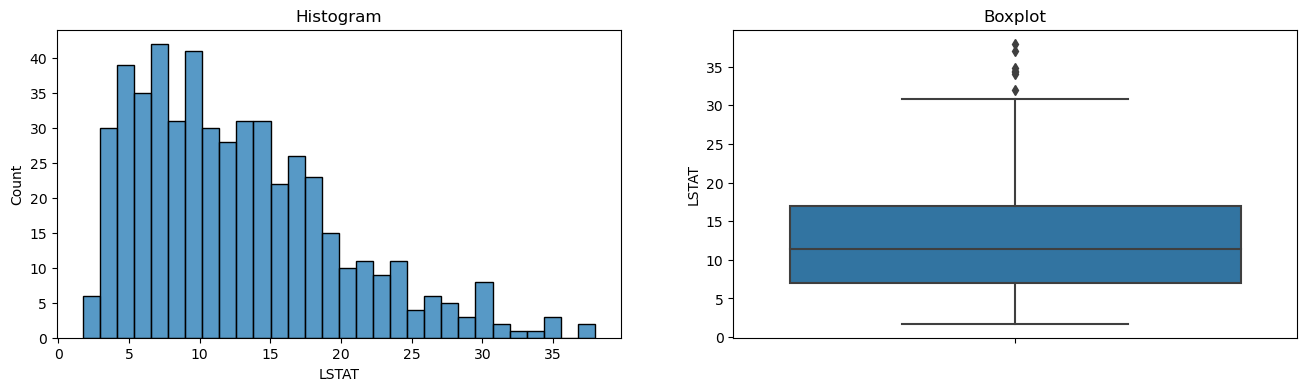


Skewness Value :  0.9064600935915367


In [59]:
# Variable LSTAT from the boston house dataset
# LSTAT is the % lower status of the population

diagnostic_plots(boston, 'LSTAT')
print('\nSkewness Value : ', boston['LSTAT'].skew())

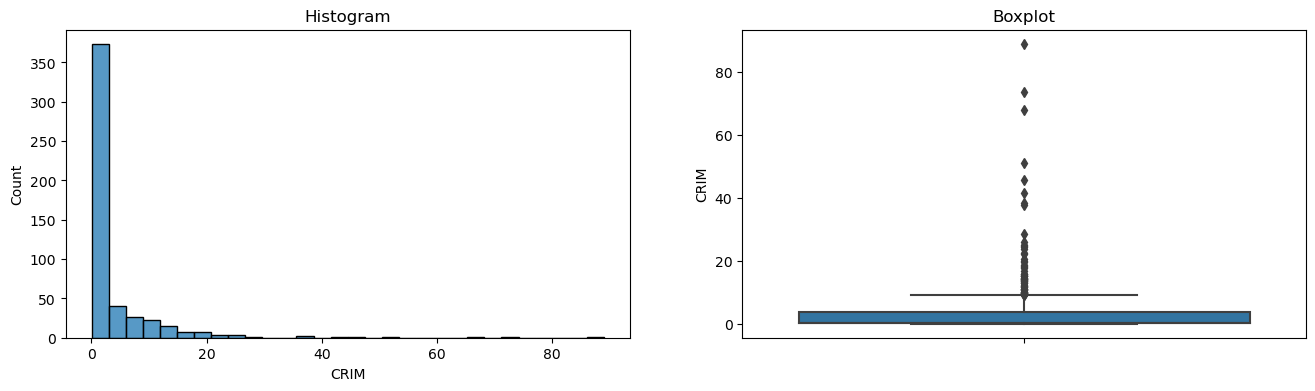


Skewness Value :  5.223148798243851


In [60]:
# Variable CRIM from the boston house dataset
# CRIM is the per capita crime rate by town

diagnostic_plots(boston, 'CRIM')
print('\nSkewness Value : ', boston['CRIM'].skew())

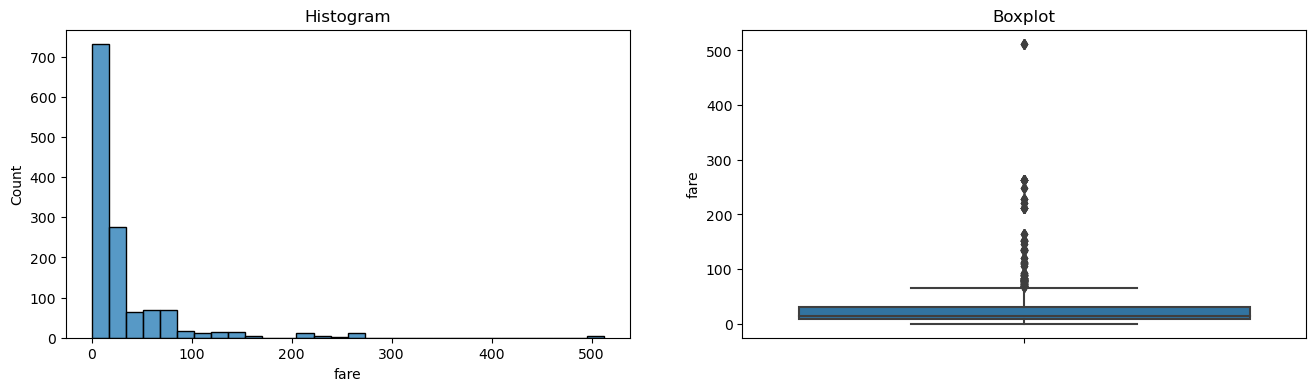


Skewness Value :  4.367709134122922


In [61]:
# Variable Fare from the titanic dataset
# Fare is the price paid for the ticket by the passengers

diagnostic_plots(titanic, 'fare')
print('\nSkewness Value : ', titanic['fare'].skew())

#### Outlier Detection for Normally Distributed Variables

In [62]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [63]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

In [64]:
# Inspect the number and percentage of outliers for `RM`

print('Total number of houses: {}'.format(len(boston)))
print('Houses with more than 8.4 rooms (right end outliers) : {}'.format(len(boston[boston['RM'] > upper_boundary])))
print('Houses with less than 4.2 rooms (left end outliers.  : {}'.format(len(boston[boston['RM'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(boston[boston['RM'] > upper_boundary]) / len(boston) * 100))
print('% left end outliers  : {}'.format(len(boston[boston['RM'] < lower_boundary]) / len(boston) * 100))

Total number of houses: 506
Houses with more than 8.4 rooms (right end outliers) : 4
Houses with less than 4.2 rooms (left end outliers.  : 4

% right end outliers : 0.7905138339920948
% left end outliers  : 0.7905138339920948


In [65]:
# Calculate boundaries for `Age` in the titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.1216336121991, -13.359364587342501)

In [66]:
# Lets look at the number and percentage of outliers

print('Total passengers         : {}'.format(len(titanic)))
print('Passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary])))
print('')
print('% of passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary]) / len(titanic) * 100))

Total passengers         : 1309
Passengers older than 73 : 3

% of passengers older than 73 : 0.2291825821237586


#### Outlier Detection for Sweked Variables

In [67]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [68]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `LSTAT` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [69]:
# Lets look at the number and percentage of outliers for `LSTAT`

print('Total houses : {}'.format(len(boston)))
print('Houses with LSTAT bigger than 32   : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])))
print('')
print('% houses with LSTAT bigger than 32 : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])/len(boston) * 100))

Total houses : 506
Houses with LSTAT bigger than 32   : 7

% houses with LSTAT bigger than 32 : 1.383399209486166


In [70]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 1.5)
upper_boundary, lower_boundary

(9.06963875, -5.31051125)

In [71]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 9   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 9 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 9   : 66

% houses with CRIM bigger than 9 : 13.043478260869565


In [72]:
# Looking for outliers, using the interquantile proximity rule IQR * 3, now lets looking for extremely high values for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [73]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 14   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 14 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 14   : 30

% houses with CRIM bigger than 14 : 5.928853754940711


In [74]:
# Finally, identify outliers in `Fare` in the titanic dataset. Lets look again for extreme values using IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(101.4126, -62.24179999999999)

In [75]:
# Lets look at the number and percentage of passengers who paid extremely high Fares

print('Total passengers : {}'.format(len(titanic)))
print('Passengers who paid more than 117   : {}'.format(len(titanic[titanic['fare'] > upper_boundary])))
print('')
print('% passengers who paid more than 117 : {}'.format(len(titanic[titanic['fare'] > upper_boundary])/len(titanic) * 100))

Total passengers : 1309
Passengers who paid more than 117   : 84

% passengers who paid more than 117 : 6.417112299465241


## B. Trimming

In [76]:
# Create a dataframe with the independent variables
# Legends : 
  # - DIS      weighted distances to five Boston employment centres
  # - LSTAT    % lower status of the population
  # - CRIM     per capita crime rate by town

boston = boston_dataset[['DIS', 'LSTAT', 'CRIM']]
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [77]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

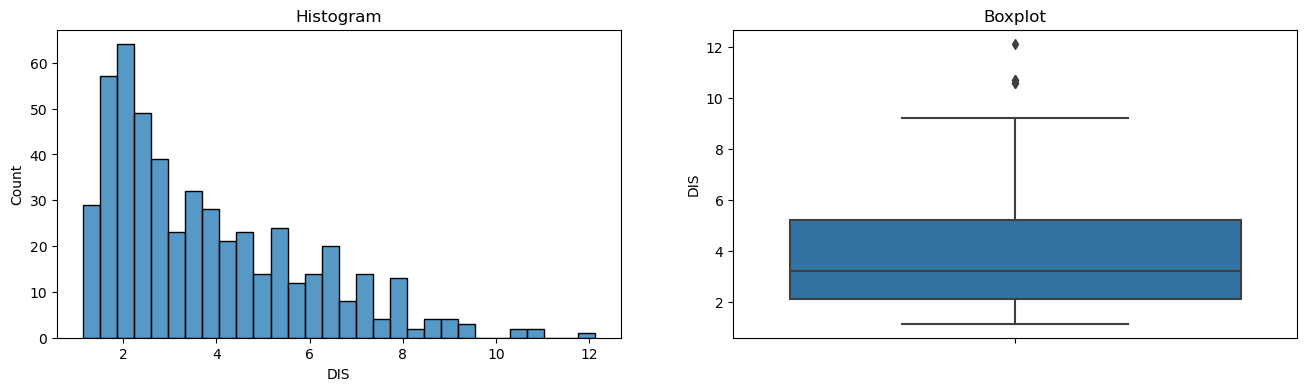

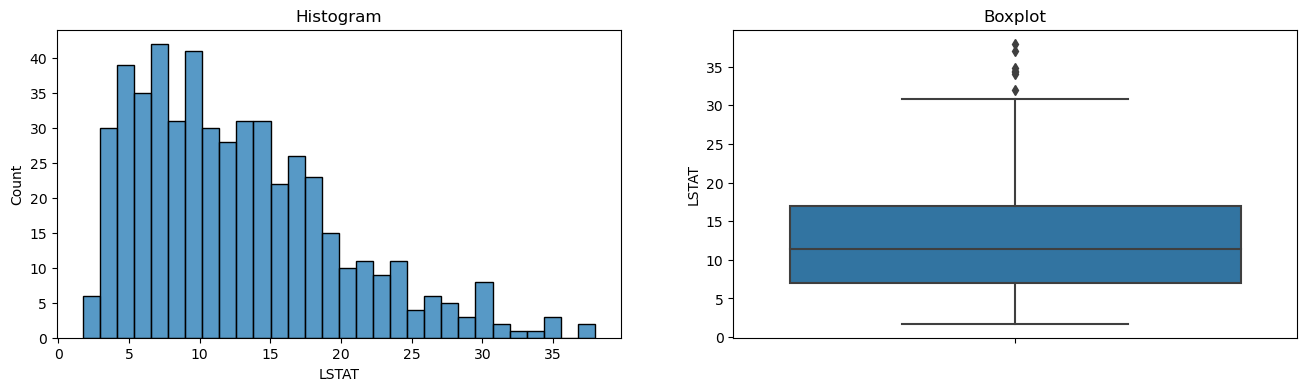

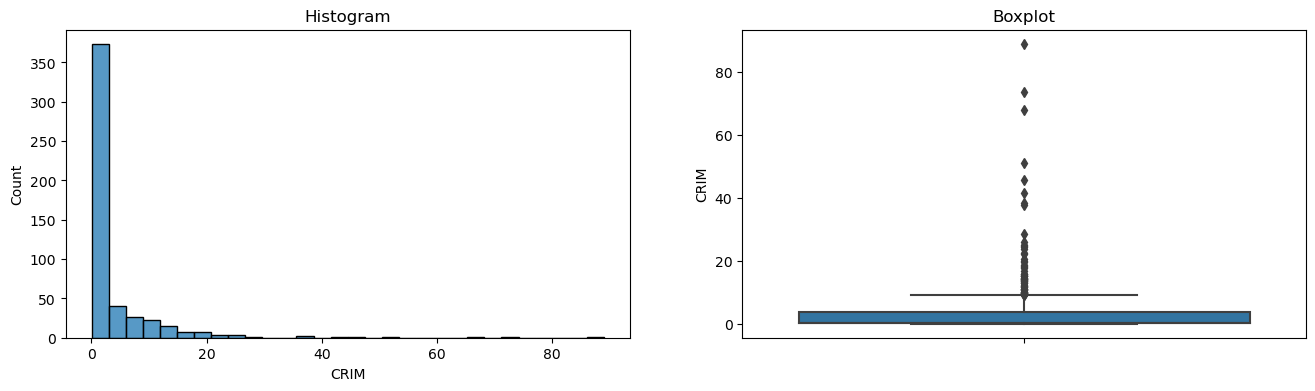

In [78]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

diagnostic_plots(boston, 'DIS')
diagnostic_plots(boston, 'LSTAT')
diagnostic_plots(boston, 'CRIM')

In [79]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [80]:
# Limits for `DIS`
DIS_upper_limit, DIS_lower_limit = find_skewed_boundaries(boston, 'DIS', 1.5)
DIS_upper_limit, DIS_lower_limit

# Limits for `LSTAT`
LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

# Limits for `CRIM`
CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

print('DIS_upper_limit : ', DIS_upper_limit)
print('DIS_lower_limit : ', DIS_lower_limit, '\n')
print('LSTAT_upper_limit : ', LSTAT_upper_limit)
print('LSTAT_lower_limit : ', LSTAT_lower_limit, '\n')
print('CRIM_upper_limit : ', CRIM_upper_limit)
print('CRIM_lower_limit : ', CRIM_lower_limit)

DIS_upper_limit :  9.820800000000002
DIS_lower_limit :  -2.5322000000000005 

LSTAT_upper_limit :  31.962500000000006
LSTAT_lower_limit :  -8.057500000000005 

CRIM_upper_limit :  9.06963875
CRIM_lower_limit :  -5.31051125


In [81]:
# Flag the outliers in category `DIS`
outliers_DIS = np.where(boston['DIS'] > DIS_upper_limit, True,
                       np.where(boston['DIS'] < DIS_lower_limit, True, False))

# Flag the outliers in category `LSTAT`
outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

# Flag the outliers in category `CRIM`
outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

print(outliers_DIS[:10])

[False False False False False False False False False False]


In [82]:
# Let's trimm the dataset

boston_trimmed = boston.loc[~(outliers_DIS + outliers_LSTAT + outliers_CRIM)]
print('Size dataset - Before trimming : ', boston.shape)
print('Size dataset - After trimming  : ', boston_trimmed.shape)

Size dataset - Before trimming :  (506, 3)
Size dataset - After trimming  :  (434, 3)


DIS - Before Trimming


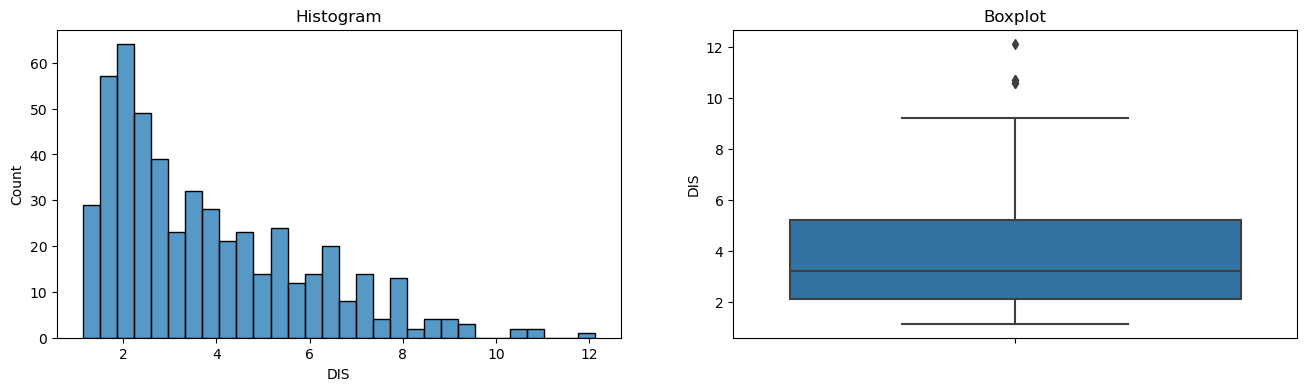


DIS - After Trimming


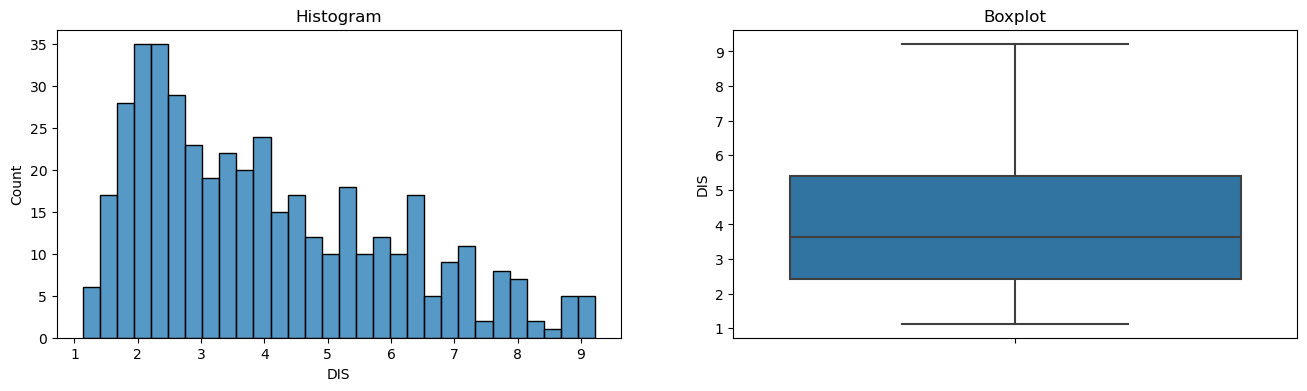


LSTAT - Before Trimming


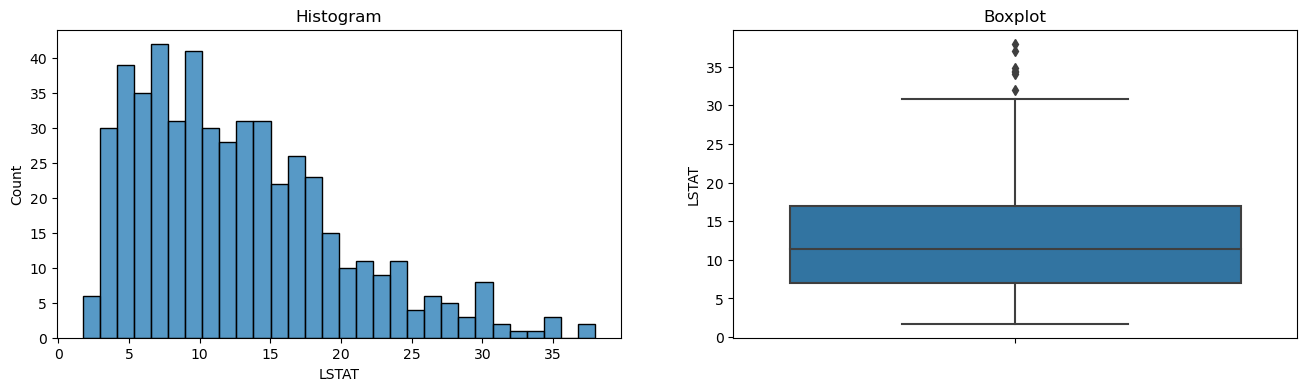


LSTAT - After Trimming


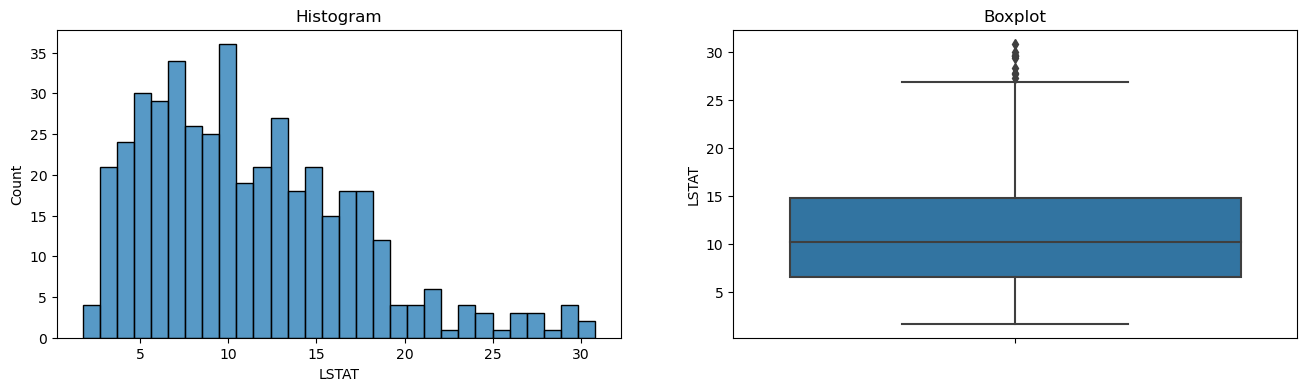


CRIM - Before Trimming


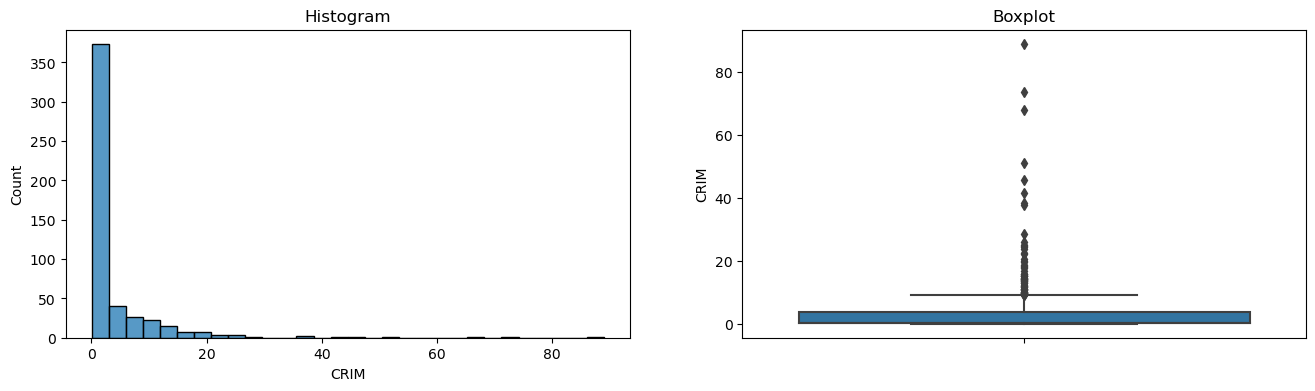


CRIM - After Trimming


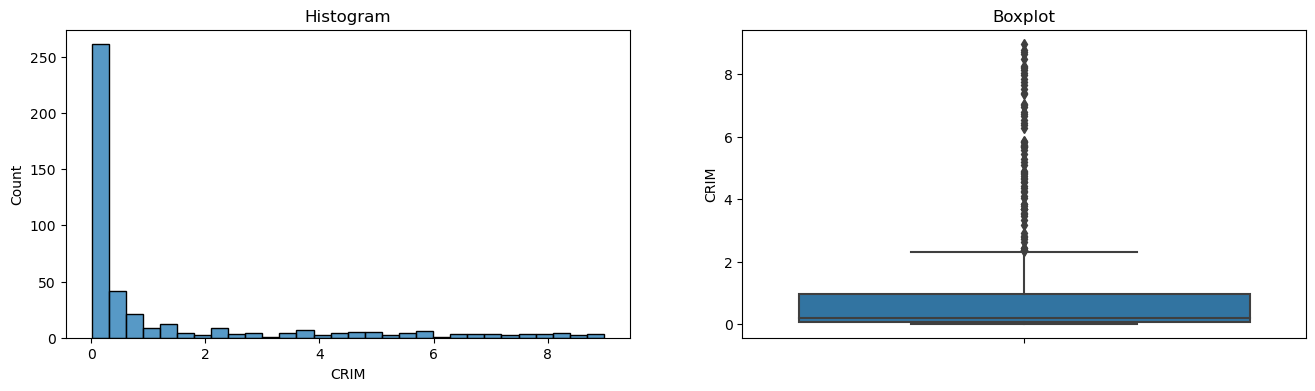

In [83]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

print('DIS - Before Trimming')
diagnostic_plots(boston, 'DIS')
print('\nDIS - After Trimming')
diagnostic_plots(boston_trimmed, 'DIS')

print('\nLSTAT - Before Trimming')
diagnostic_plots(boston, 'LSTAT')
print('\nLSTAT - After Trimming')
diagnostic_plots(boston_trimmed, 'LSTAT')

print('\nCRIM - Before Trimming')
diagnostic_plots(boston, 'CRIM')
print('\nCRIM - After Trimming')
diagnostic_plots(boston_trimmed, 'CRIM')

## C. Censoring

In [84]:
!pip install feature-engine

from feature_engine.outliers import Winsorizer

                                              0.0/319.4 kB ? eta -:--:--
     -                                        10.2/319.4 kB ? eta -:--:--
     -                                        10.2/319.4 kB ? eta -:--:--
     ---                                   30.7/319.4 kB 187.9 kB/s eta 0:00:02
     ---                                   30.7/319.4 kB 187.9 kB/s eta 0:00:02
     -------                               61.4/319.4 kB 252.2 kB/s eta 0:00:02
     ----------                            92.2/319.4 kB 309.1 kB/s eta 0:00:01
     -------------                        122.9/319.4 kB 343.4 kB/s eta 0:00:01
     -------------------                  174.1/319.4 kB 436.9 kB/s eta 0:00:01
     ---------------------------          245.8/319.4 kB 580.1 kB/s eta 0:00:01
     -----------------------------------  317.4/319.4 kB 678.1 kB/s eta 0:00:01
     -----------------------------------  317.4/319.4 kB 678.1 kB/s eta 0:00:01
     -----------------------------------  317.4/319.4 kB 67

In [85]:
# Create a dataframe with the independent variables
# Legends : 
  # - DIS      weighted distances to five Boston employment centres
  # - LSTAT    % lower status of the population
  # - CRIM     per capita crime rate by town
  
boston = boston_dataset[['DIS', 'LSTAT', 'CRIM']]
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [86]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['DIS', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

boston_t = windsoriser.transform(boston)

In [87]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'DIS': -2.5322000000000005, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}
Right Tail Caps :  {'DIS': 9.820800000000002, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}


In [88]:
print('Boston Dataframe - Before Capping')
print(boston.describe())
print('')
print('Boston Dataframe - After Capping')
print(boston_t.describe())

Boston Dataframe - Before Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.795043   12.653063    3.613524
std      2.105710    7.141062    8.601545
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max     12.126500   37.970000   88.976200

Boston Dataframe - After Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.783947   12.612011    2.225032
std      2.069765    7.016829    3.313353
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max      9.820800   31.962500    9.069639


DIS - Before Capping


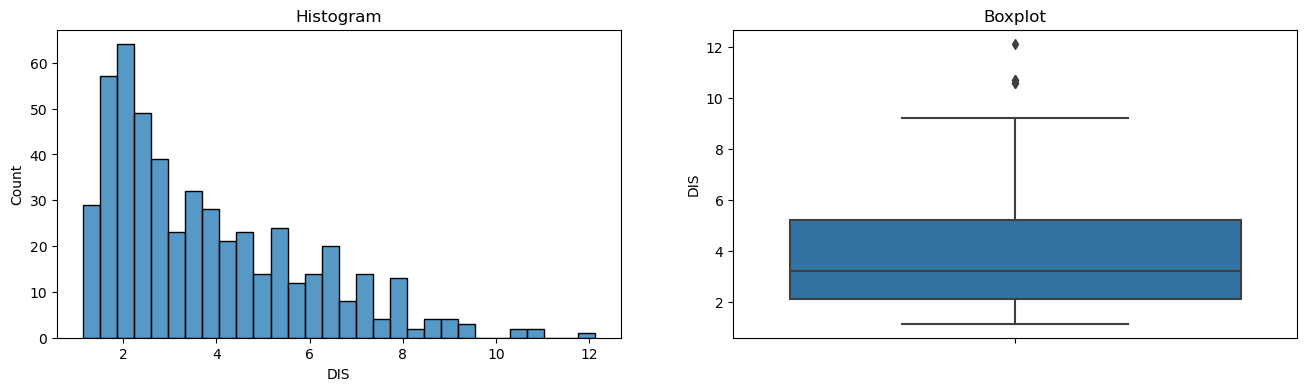


DIS - After Capping


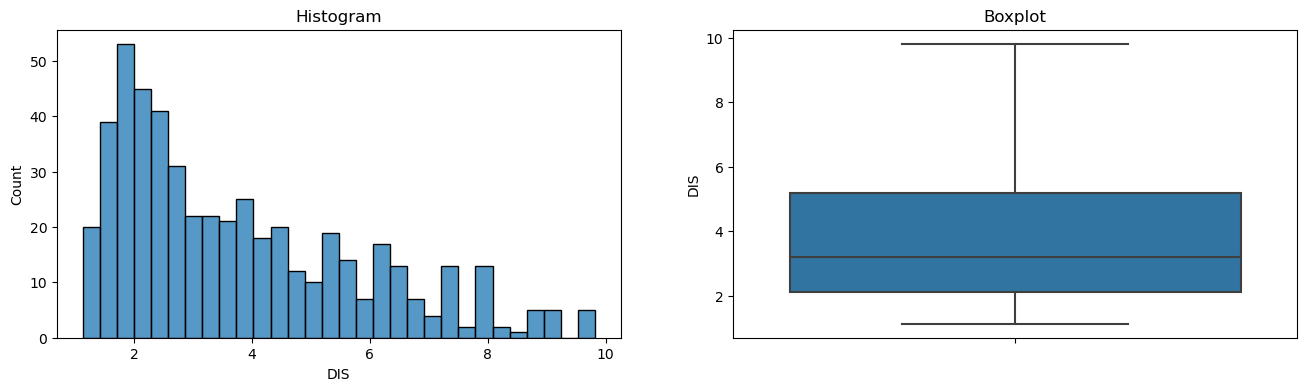


LSTAT - Before Capping


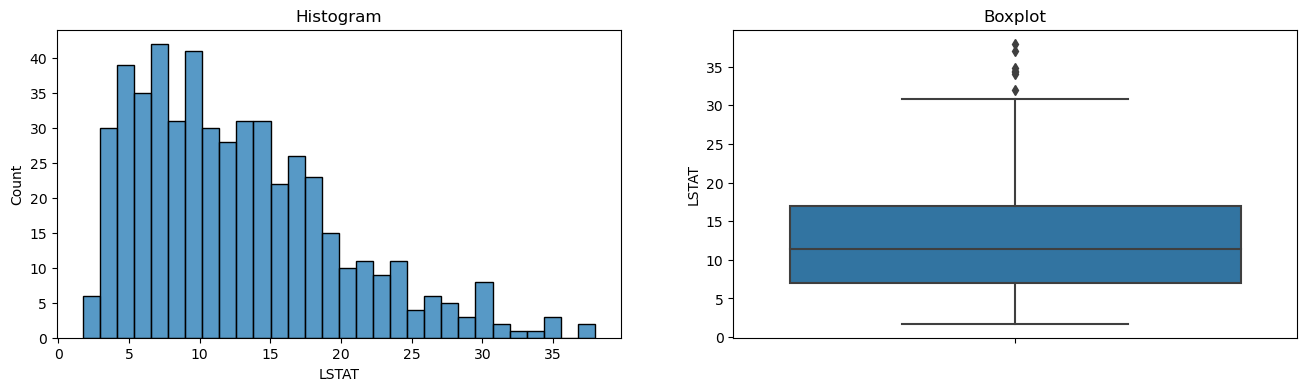


LSTAT - After Capping


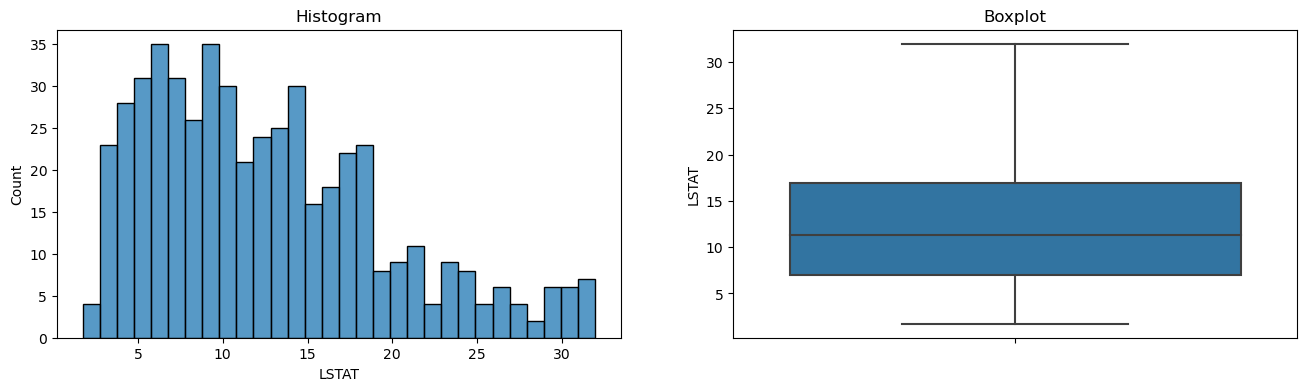


CRIM - Before Capping


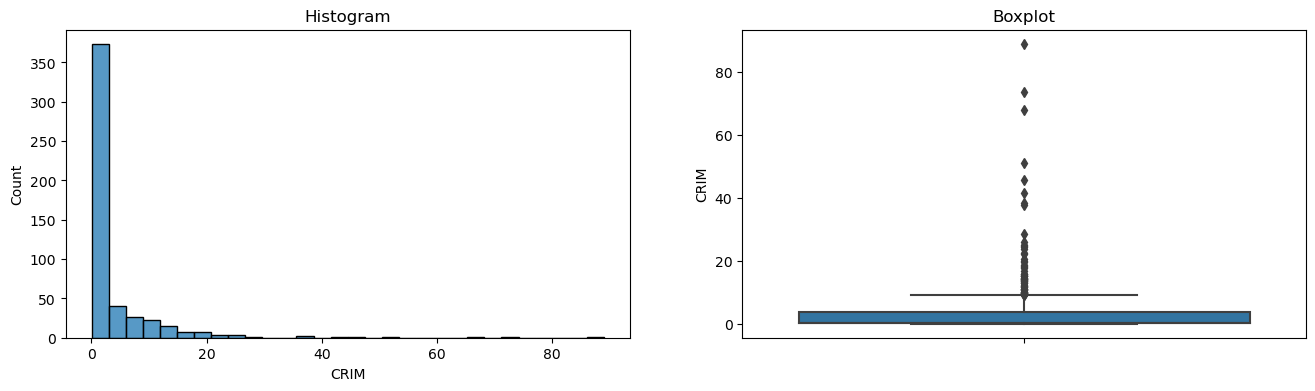


CRIM - After Capping


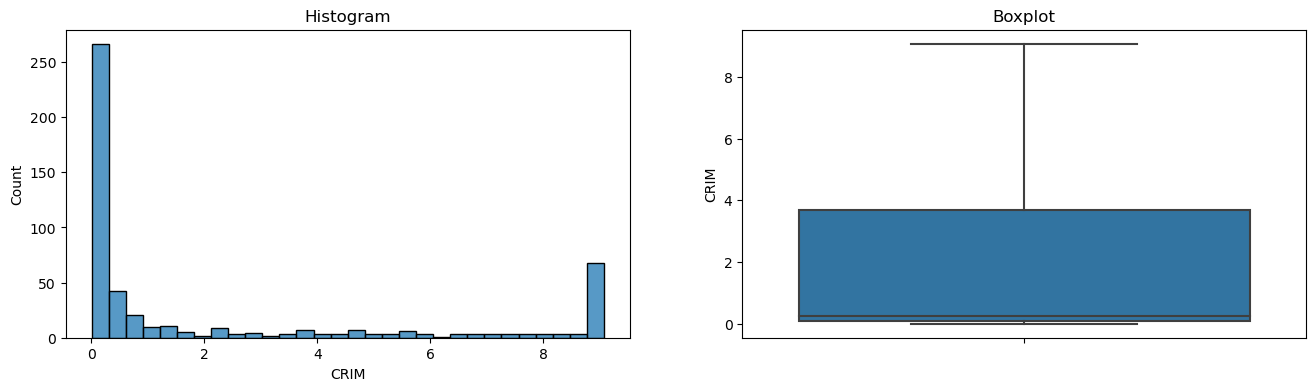

In [89]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

print('DIS - Before Capping')
diagnostic_plots(boston, 'DIS')
print('\nDIS - After Capping')
diagnostic_plots(boston_t, 'DIS')

print('\nLSTAT - Before Capping')
diagnostic_plots(boston, 'LSTAT')
print('\nLSTAT - After Capping')
diagnostic_plots(boston_t, 'LSTAT')

print('\nCRIM - Before Capping')
diagnostic_plots(boston, 'CRIM')
print('\nCRIM - After Capping')
diagnostic_plots(boston_t, 'CRIM')

## E. Cardinality

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [91]:
# Load the Titanic dataset

url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
data = pd.read_csv(url)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [93]:
# Let's inspect the cardinality, this is the number of different labels, for the different categorical variables

print('Number of categories in the variable Name     : {}'.format(len(data.name.unique())))
print('Number of categories in the variable Gender   : {}'.format(len(data.sex.unique())))
print('Number of categories in the variable Ticket   : {}'.format(len(data.ticket.unique())))
print('Number of categories in the variable Cabin    : {}'.format(len(data.cabin.unique())))
print('Number of categories in the variable Embarked : {}'.format(len(data.embarked.unique())))
print('Total number of passengers in the Titanic.    : {}'.format(len(data)))

Number of categories in the variable Name     : 1307
Number of categories in the variable Gender   : 2
Number of categories in the variable Ticket   : 929
Number of categories in the variable Cabin    : 187
Number of categories in the variable Embarked : 4
Total number of passengers in the Titanic.    : 1309


In [94]:
# Let's explore the values / categories of `Cabin`
# We know from the previous cell that there are 187 different cabins, therefore the variable is highly cardinal
data.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [95]:
# Let's capture the first letter of Cabin

data['Cabin_reduced'] = data['cabin'].astype(str).str[0]

print(data[['cabin', 'Cabin_reduced']].head())
print('Number of categories in the variable Cabin : {}'.format(len(data.cabin.unique())))
print('Number of categories in the variable Cabin reduced : {}'.format(len(data.Cabin_reduced.unique())))

     cabin Cabin_reduced
0       B5             B
1  C22 C26             C
2  C22 C26             C
3  C22 C26             C
4  C22 C26             C
Number of categories in the variable Cabin : 187
Number of categories in the variable Cabin reduced : 9


In [96]:
# Let's separate into training and testing set in order to build machine learning models

use_cols = ['cabin', 'Cabin_reduced', 'sex']

X_train, X_test, y_train, y_test = train_test_split(data[use_cols], 
                                                    data['survived'],  
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

### High Cardinality Leads to Uneven Distribution of Categories in Train and Test Sets

In [97]:
# Let's find out labels that only present in the training set and labels that only present in the test set

unique_to_train_set = [x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()]
unique_to_test_set = [x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  116
Total unique_to_test_set  :  36


In [98]:
# Let's find out labels that only present in the training set and only present in the test set for Cabin with reduced cardinality

unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]

unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  1
Total unique_to_test_set  :  0


### Effect of Cardinality on Machine Learning Model Performance

In [99]:
# Let's re-map Cabin into numbers so we can use it to train ML models

# I will replace each cabin by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms

cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
print('cabin_dict : ', cabin_dict)
print('Total Cabin Unique - X_train : ', len(X_train.cabin.unique()))
print('Total Cabin Unique - Data    : ', len(data.cabin.unique()))

cabin_dict :  {'?': 0, 'E36': 1, 'C68': 2, 'E24': 3, 'C22 C26': 4, 'D38': 5, 'B50': 6, 'A24': 7, 'C111': 8, 'F': 9, 'C6': 10, 'C87': 11, 'E8': 12, 'B45': 13, 'C93': 14, 'D28': 15, 'D36': 16, 'C125': 17, 'B35': 18, 'T': 19, 'B73': 20, 'B57 B59 B63 B66': 21, 'A26': 22, 'A18': 23, 'B96 B98': 24, 'G6': 25, 'C78': 26, 'C101': 27, 'D9': 28, 'D33': 29, 'C128': 30, 'E50': 31, 'B26': 32, 'B69': 33, 'E121': 34, 'C123': 35, 'B94': 36, 'A34': 37, 'D': 38, 'C39': 39, 'D43': 40, 'E31': 41, 'B5': 42, 'D17': 43, 'F33': 44, 'E44': 45, 'D7': 46, 'A21': 47, 'D34': 48, 'A29': 49, 'D35': 50, 'A11': 51, 'B51 B53 B55': 52, 'D46': 53, 'E60': 54, 'C30': 55, 'D26': 56, 'E68': 57, 'A9': 58, 'B71': 59, 'D37': 60, 'F2': 61, 'C55 C57': 62, 'C89': 63, 'C124': 64, 'C23 C25 C27': 65, 'C126': 66, 'E49': 67, 'F E46': 68, 'E46': 69, 'D19': 70, 'B58 B60': 71, 'C82': 72, 'B52 B54 B56': 73, 'C92': 74, 'E45': 75, 'F G73': 76, 'C65': 77, 'E25': 78, 'B3': 79, 'D40': 80, 'C91': 81, 'B102': 82, 'B61': 83, 'F G63': 84, 'A20': 85,

In [100]:
# Replace the labels in Cabin, using the dict `cabin_dict` created above
X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'cabin'].map(cabin_dict)
X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'cabin'].map(cabin_dict)

X_train[['Cabin_mapped', 'cabin']].head(10)

,Cabin_mapped,cabin
501,0,?
588,0,?
402,0,?
1193,0,?
686,0,?
971,0,?
117,1,E36
540,0,?
294,2,C68
261,3,E24


In [101]:
# Display First 10 Data in `X_train`
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,?,female,0
588,?,?,female,0
402,?,?,female,0
1193,?,?,male,0
686,?,?,female,0
971,?,?,male,0
117,E36,E,female,1
540,?,?,female,0
294,C68,C,male,2
261,E24,E,male,3


In [102]:
# Now we will replace the letters in the reduced cabin variable (`Cabin_reduced`) with the same procedure

# Create replace dictionary
cabin_dict = {k: i for i, k in enumerate(X_train['Cabin_reduced'].unique(), 0)}

print('Before Replace')
print(X_train[['Cabin_reduced', 'cabin']].head(10))
print('')

# Replace labels by numbers with dictionary
X_train.loc[:, 'Cabin_reduced'] = X_train.loc[:, 'Cabin_reduced'].map(cabin_dict)
X_test.loc[:, 'Cabin_reduced'] = X_test.loc[:, 'Cabin_reduced'].map(cabin_dict)

print('After Replace')
print(X_train[['Cabin_reduced', 'cabin']].head(10))
print('')

Before Replace
     Cabin_reduced cabin
501              ?     ?
588              ?     ?
402              ?     ?
1193             ?     ?
686              ?     ?
971              ?     ?
117              E   E36
540              ?     ?
294              C   C68
261              E   E24

After Replace
     Cabin_reduced cabin
501              0     ?
588              0     ?
402              0     ?
1193             0     ?
686              0     ?
971              0     ?
117              1   E36
540              0     ?
294              2   C68
261              1   E24



In [103]:
# Display First 10 Data in `X_train`
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,0,female,0
588,?,0,female,0
402,?,0,female,0
1193,?,0,male,0
686,?,0,female,0
971,?,0,male,0
117,E36,1,female,1
540,?,0,female,0
294,C68,2,male,2
261,E24,1,male,3


In [104]:
# Re-map the categorical variable `Sex` into numbers

X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: object

In [105]:
# Check if there are missing values in these variables

X_train[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     0
Cabin_reduced    0
sex              0
dtype: int64

In [106]:
X_test[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     42
Cabin_reduced     0
sex               0
dtype: int64

In [107]:
# Display row in `X_test` that contains missing values
X_test[X_test.isna().any(axis=1)]

,cabin,Cabin_reduced,sex,Cabin_mapped
5,E12,1,0,NaN
231,C104,2,0,NaN
31,A31,5,0,NaN
161,D11,3,1,NaN
215,D48,3,0,NaN
141,D10 D12,3,1,NaN
45,B38,4,0,NaN
152,D45,3,0,NaN
233,C50,2,1,NaN
268,C31,2,0,NaN


In [108]:
# Display X_train
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,0,1,0
588,?,0,1,0
402,?,0,1,0
1193,?,0,0,0
686,?,0,1,0
971,?,0,0,0
117,E36,1,1,1
540,?,0,1,0
294,C68,2,0,2
261,E24,1,0,3


### Random Forest

In [109]:
# Model built on data with high cardinality for cabin

# Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model
rf.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = rf.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8561832352985574
Test set
Random Forests roc-auc: 0.7707953099939163


In [110]:
# Model built on data with low cardinality for cabin

# Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model
rf.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set
pred_train = rf.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_reduced', 'sex']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


### Logistic Regression

In [111]:
# Model build on data with plenty of categories in Cabin variable

# Call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model
logit.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = logit.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8135594926008485
Test set
Logistic regression roc-auc: 0.7744732039157127


In [112]:
# Model build on data with fewer categories in Cabin Variable

# Call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model
logit.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set
pred_train = logit.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602
